<a href="https://colab.research.google.com/github/nnaemekaukpa/Leveraging-Deep-Learning-Architecture-for-Accurate-and-Efficient-Bone-Cancer-Detection-/blob/main/AlexNet_%2B_Canny_Edge__(split701515).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing the necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image as mpimg
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/train'
valid_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/valid'
test_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/test'

In [4]:
import os
import shutil
import random

train_dir = os.path.join(train_dataset, "")
val_dir = os.path.join(valid_dataset, "")
test_dir = os.path.join(test_dataset, "")
categories = ["normal", "cancer"]
target_val_size = 2643
target_test_size = 2643

## Validation dataset splitting
current_total_val = sum(len(os.listdir(os.path.join(val_dir, cat))) for cat in categories)
images_needed_val = max(0, target_val_size - current_total_val)

if images_needed_val == 0:
    print("Validation dataset is now splitted")
else:
    moved_count_val = 0
    for category in categories:
        train_path = os.path.join(train_dir, category)
        val_path = os.path.join(val_dir, category)
        train_images = os.listdir(train_path)
        images_to_move_val = min(images_needed_val // 2, len(train_images))

        for image in random.sample(train_images, images_to_move_val):
            shutil.move(os.path.join(train_path, image), os.path.join(val_path, image))
            moved_count_val += 1
            print(f"Moved {images_to_move_val} images to '{val_path}'")
print("Validation image movement is now complete")

## Testing dataset splitting
current_total_test = sum(len(os.listdir(os.path.join(test_dir, cat))) for cat in categories)
images_needed_test = max(0, target_test_size - current_total_test)

if images_needed_test == 0:
    print("Testing dataset is now splitted")
else:
    moved_count_test = 0
    for category in categories:
        train_path = os.path.join(train_dir, category)
        test_path = os.path.join(test_dir, category)
        train_images = os.listdir(train_path)
        images_to_move_test = min(images_needed_test // 2, len(train_images))

        for image in random.sample(train_images, images_to_move_test):
            shutil.move(os.path.join(train_path, image), os.path.join(test_path, image))
            moved_count_test += 1
            print(f"Moved {images_to_move_test} images to '{test_path}'")
print("Testing image movement is now complete")


Validation dataset is now splitted
Validation image movement is now complete
Testing dataset is now splitted
Testing image movement is now complete


In [5]:
## function to list files and folder in the directory
def list_contents(directory):
  if os.path.exists(directory):
    print(f'contents of {directory}:')
    print(os.listdir(directory))
  else:
    print(f'{directory} does not exist')



In [6]:
list_contents(train_dataset)
list_contents(valid_dataset)
list_contents(test_dataset)

contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/train:
['normal', 'cancer']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/valid:
['cancer', 'normal']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/test:
['normal', 'cancer']


In [7]:
def count_files(directory):
  if os.path.exists(directory):
    classes=[i for i in os.listdir(directory) if os.path.isdir(os.path.join(directory, i))]
    total_files=sum([len(files) for _,_,files in os.walk(directory)])
    print(f'found {total_files} images belonging to {len(classes)} classes.')
  else:
    print(f'{directory} does not exist')

In [8]:
count_files(train_dataset)
count_files(valid_dataset)
count_files(test_dataset)

found 17617 images belonging to 2 classes.
found 2643 images belonging to 2 classes.
found 2643 images belonging to 2 classes.


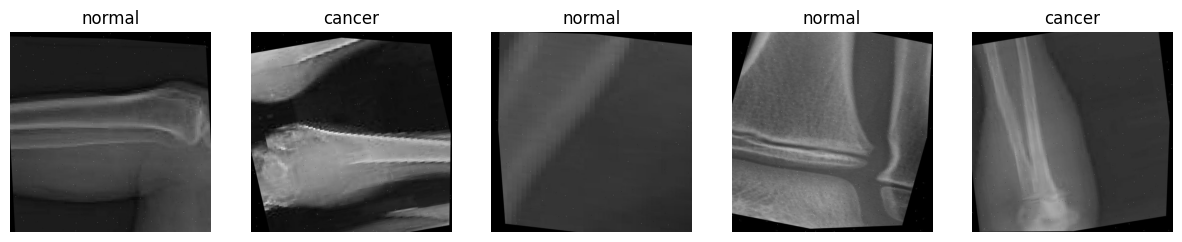

In [9]:


# Get classes (subfolders)
classes = [i for i in os.listdir(train_dataset) if os.path.isdir(os.path.join(train_dataset, i))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(train_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1,5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")
plt.show()


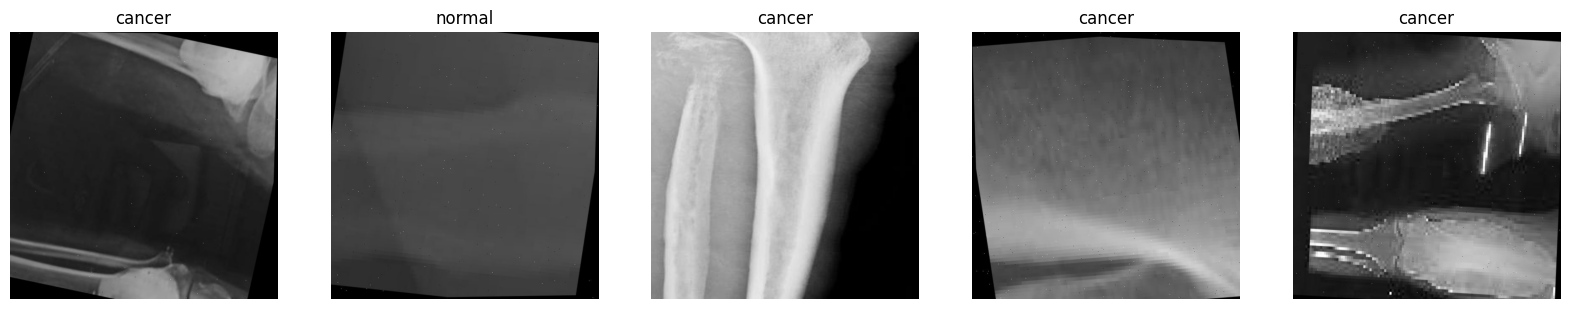

In [10]:


# Get classes (subfolders)
classes = [d for d in os.listdir(test_dataset) if os.path.isdir(os.path.join(test_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(test_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


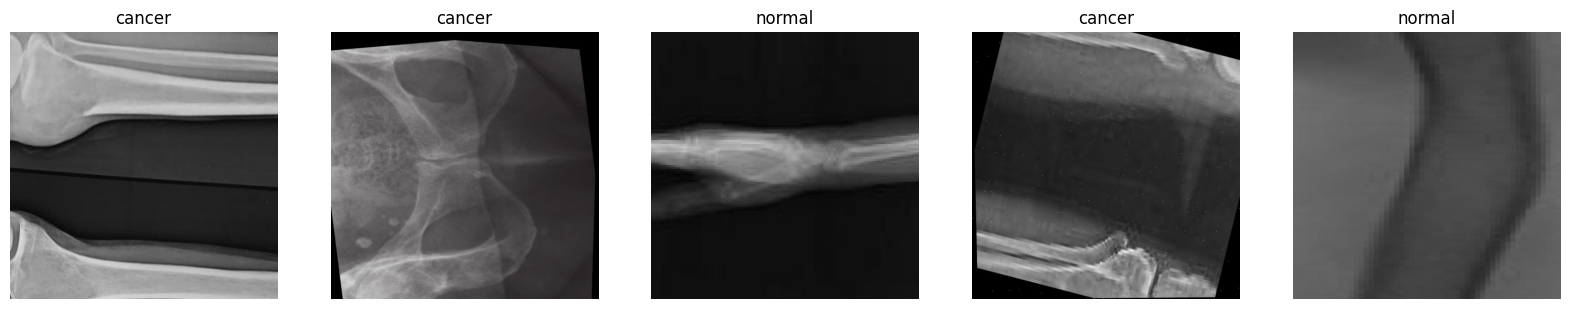

In [11]:


# Get classes (subfolders)
classes = [d for d in os.listdir(valid_dataset) if os.path.isdir(os.path.join(valid_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(valid_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


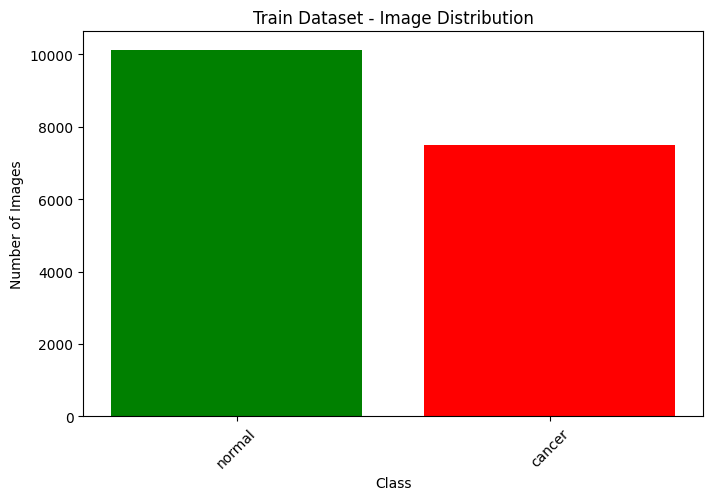

In [12]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(train_dataset):
    class_path = os.path.join(train_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Train Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



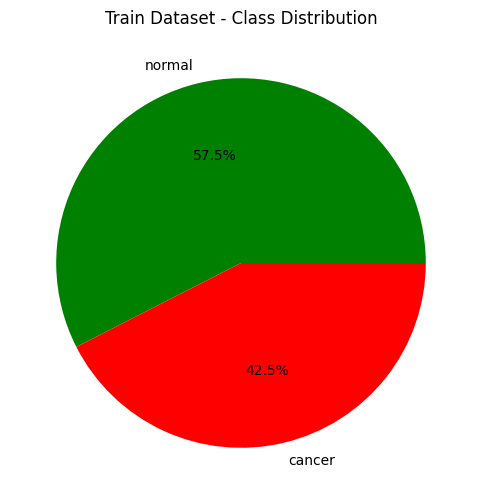

In [13]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title("Train Dataset - Class Distribution")
plt.show()

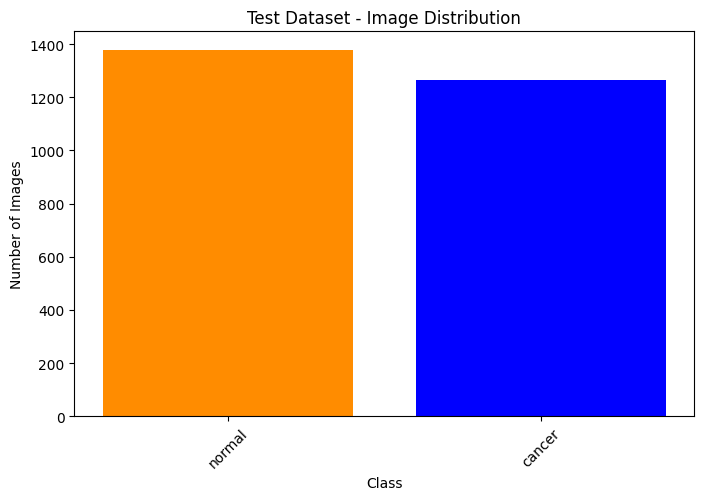

In [14]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(test_dataset):
    class_path = os.path.join(test_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.values()
plt.bar(class_counts.keys(), class_counts.values(), color=['darkorange','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Test Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



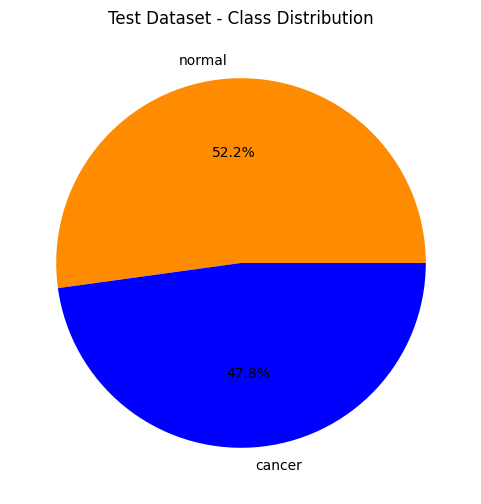

In [15]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['darkorange', 'blue'])
plt.title("Test Dataset - Class Distribution")
plt.show()

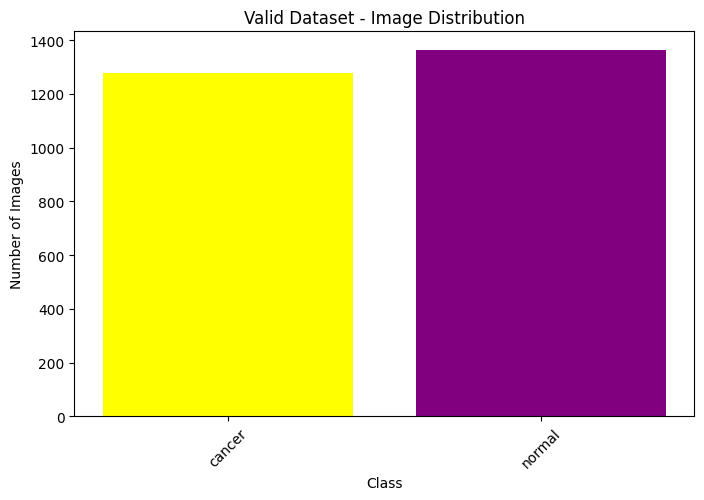

In [16]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(valid_dataset):
    class_path = os.path.join(valid_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=[ 'yellow', 'purple'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Valid Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



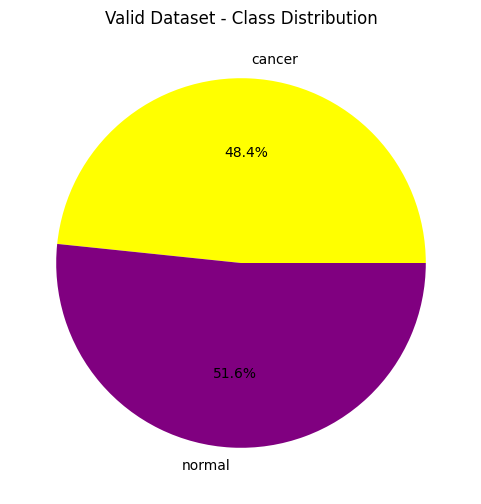

In [17]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['yellow', 'purple'])
plt.title("Valid Dataset - Class Distribution")
plt.show()

In [18]:
import pandas as pd

In [19]:
def preprocess_image(image_path):
    """
    Function to read an image, resize it, and apply Canny edge detection.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (227, 227))
    edges = cv2.Canny(img, 100, 200)
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    return edges

In [20]:
def preprocess_and_load(image_path):
    """
    Load image and apply preprocessing using Canny edge detection.
    """
    img = preprocess_image(image_path)
    return img

In [21]:
datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image
)

In [22]:
def create_dataframe(dataset_path):
    data = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                data.append([os.path.join(class_name, image_file), class_name])  # [image, label]
    return pd.DataFrame(data, columns=['image', 'label'])

train_df = create_dataframe(train_dataset)
test_df = create_dataframe(test_dataset)
valid_df = create_dataframe(valid_dataset)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image and batch sizes
image_size = (227, 227)
batch_size = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


# No augmentation for validation and test data
test_val_datagen = ImageDataGenerator(rescale=1./255)

#  Training generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    directory=train_dataset
)

#  Validation generator
valid_generator = test_val_datagen.flow_from_dataframe(
    valid_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=valid_dataset
)

#  Test generator
test_generator = test_val_datagen.flow_from_dataframe(
    test_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=test_dataset
)


Found 17617 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.


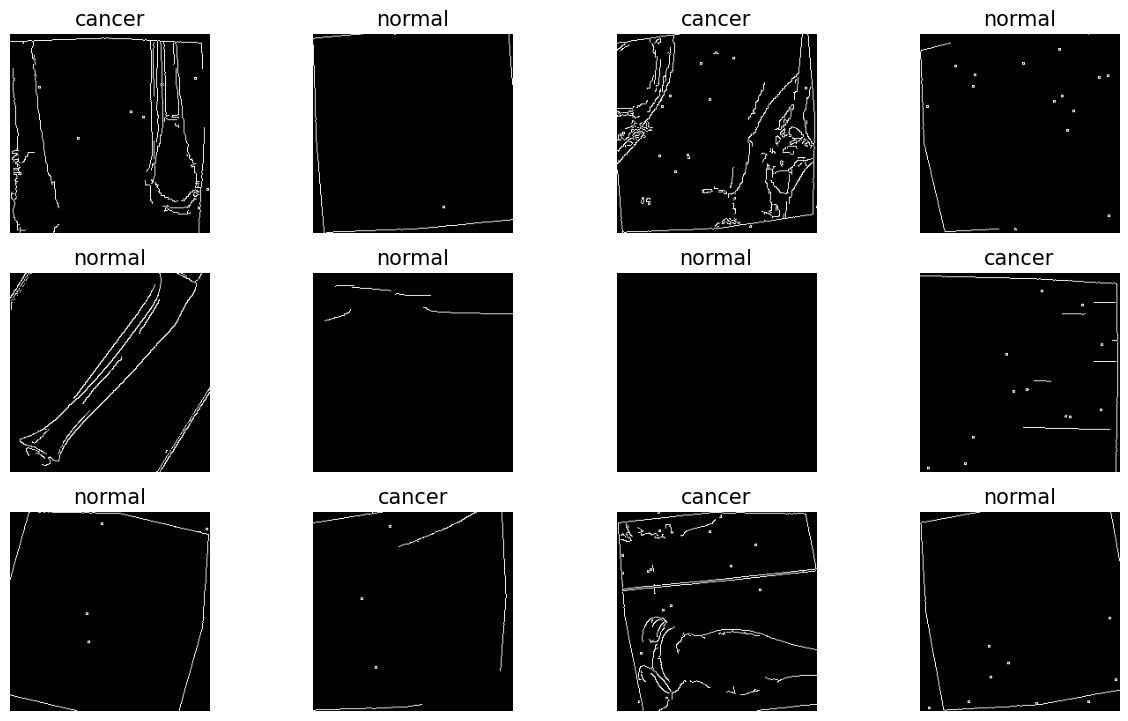

In [24]:
plt.figure(figsize=(15, 15))
for n, i in enumerate(np.random.randint(0, len(train_df), 12)):
    plt.subplot(5, 4, n + 1)
    # Get the full image path by joining it with the train_dataset directory
    image_path = os.path.join(train_dataset, train_df.image[i])
    img = preprocess_image(image_path)

    # Add a check to see if the image was loaded correctly
    if img is not None:
        plt.imshow(img)
        plt.axis('off')
        plt.title(train_df.label[i], fontsize=15)
    else:
        print(f"Failed to load image: {image_path}")

plt.show()

In [25]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf

# Binary classification - sigmoid output
class_num = 1

# Define model
model = models.Sequential()

# Layer 1 (frozen): Conv + BN + MaxPool
model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3),
                        kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.layers[-3].trainable = False  # Freeze first Conv layer

# Layer 2 (frozen): Conv + BN + MaxPool
model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.layers[-3].trainable = False  # Freeze second Conv layer

# Layer 3: Conv + ReLU + L2
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))

# Layer 4: Conv + ReLU + L2
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))

# Layer 5: Conv + ReLU + MaxPool + L2
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

# Flatten before fully connected layers
model.add(layers.Flatten())

# FC1: Dense + Dropout + L2
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))

# FC2: Dense + Dropout + L2
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))

# Output Layer
model.add(layers.Dense(class_num, activation='sigmoid'))

# Compile
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                       tf.keras.metrics.SpecificityAtSensitivity(0.6)])
# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │    18,876,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,724,225 (94.32 MB)

 Trainable params: 24,073,921 (91.83 MB)

 Non-trainable params: 650,304 (2.48 MB)

In [26]:
from tensorflow.keras.optimizers import Adam # Importing the Adam optimizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics
import  tensorflow.keras as keras


In [27]:
early_stop = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

callbacks = [early_stop, lr_scheduler, checkpoint]

history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=10,
                    callbacks=callbacks)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7437 - auc: 0.8157 - loss: 3.2896 - specificity_at_sensitivity: 0.8639

551/551 ━━━━━━━━━━━━━━━━━━━━ 4439s 8s/step - accuracy: 0.7438 - auc: 0.8158 - loss: 3.2877 - specificity_at_sensitivity: 0.8640 - val_accuracy: 0.7911 - val_auc: 0.8838 - val_loss: 1.2360 - val_specificity_at_sensitivity: 0.9546 - learning_rate: 5.0000e-04
Epoch 2/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.8102 - auc: 0.8962 - loss: 0.9807 - specificity_at_sensitivity: 0.9508

551/551 ━━━━━━━━━━━━━━━━━━━━ 365s 660ms/step - accuracy: 0.8102 - auc: 0.8962 - loss: 0.9805 - specificity_at_sensitivity: 0.9508 - val_accuracy: 0.8146 - val_auc: 0.9139 - val_loss: 0.6869 - val_specificity_at_sensitivity: 0.9656 - learning_rate: 5.0000e-04
Epoch 3/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.8089 - auc: 0.8986 - loss: 0.6507 - specificity_at_sensitivity: 0.9514

551/551 ━━━━━━━━━━━━━━━━━━━━ 359s 651ms/step - accuracy: 0.8089 - auc: 0.8986 - loss: 0.6507 - specificity_at_sensitivity: 0.9514 - val_accuracy: 0.8350 - val_auc: 0.9264 - val_loss: 0.5044 - val_specificity_at_sensitivity: 0.9773 - learning_rate: 5.0000e-04
Epoch 4/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.8167 - auc: 0.9064 - loss: 0.5281 - specificity_at_sensitivity: 0.9559

551/551 ━━━━━━━━━━━━━━━━━━━━ 361s 654ms/step - accuracy: 0.8167 - auc: 0.9064 - loss: 0.5281 - specificity_at_sensitivity: 0.9559 - val_accuracy: 0.8558 - val_auc: 0.9341 - val_loss: 0.4631 - val_specificity_at_sensitivity: 0.9703 - learning_rate: 5.0000e-04
Epoch 5/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.8222 - auc: 0.9079 - loss: 0.4892 - specificity_at_sensitivity: 0.9540

551/551 ━━━━━━━━━━━━━━━━━━━━ 366s 665ms/step - accuracy: 0.8222 - auc: 0.9079 - loss: 0.4891 - specificity_at_sensitivity: 0.9540 - val_accuracy: 0.8320 - val_auc: 0.9334 - val_loss: 0.4294 - val_specificity_at_sensitivity: 0.9757 - learning_rate: 5.0000e-04
Epoch 6/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 379s 659ms/step - accuracy: 0.8262 - auc: 0.9149 - loss: 0.4537 - specificity_at_sensitivity: 0.9620 - val_accuracy: 0.8475 - val_auc: 0.9269 - val_loss: 0.4569 - val_specificity_at_sensitivity: 0.9773 - learning_rate: 5.0000e-04
Epoch 7/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.8316 - auc: 0.9177 - loss: 0.4336 - specificity_at_sensitivity: 0.9638

551/551 ━━━━━━━━━━━━━━━━━━━━ 364s 660ms/step - accuracy: 0.8316 - auc: 0.9177 - loss: 0.4336 - specificity_at_sensitivity: 0.9638 - val_accuracy: 0.8543 - val_auc: 0.9381 - val_loss: 0.3816 - val_specificity_at_sensitivity: 0.9836 - learning_rate: 5.0000e-04
Epoch 8/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 357s 647ms/step - accuracy: 0.8302 - auc: 0.9157 - loss: 0.4284 - specificity_at_sensitivity: 0.9601 - val_accuracy: 0.8543 - val_auc: 0.9370 - val_loss: 0.3851 - val_specificity_at_sensitivity: 0.9742 - learning_rate: 5.0000e-04
Epoch 9/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.8314 - auc: 0.9183 - loss: 0.4145 - specificity_at_sensitivity: 0.9666

551/551 ━━━━━━━━━━━━━━━━━━━━ 363s 658ms/step - accuracy: 0.8314 - auc: 0.9183 - loss: 0.4145 - specificity_at_sensitivity: 0.9666 - val_accuracy: 0.8581 - val_auc: 0.9359 - val_loss: 0.3774 - val_specificity_at_sensitivity: 0.9789 - learning_rate: 5.0000e-04
Epoch 10/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 356s 646ms/step - accuracy: 0.8326 - auc: 0.9158 - loss: 0.4173 - specificity_at_sensitivity: 0.9588 - val_accuracy: 0.8267 - val_auc: 0.9323 - val_loss: 0.3845 - val_specificity_at_sensitivity: 0.9750 - learning_rate: 5.0000e-04


In [28]:
hist_=pd.DataFrame(history.history)
hist_

,accuracy,auc,loss,specificity_at_sensitivity,val_accuracy,val_auc,val_loss,val_specificity_at_sensitivity,learning_rate
0,0.775614,0.859524,2.214081,0.915854,0.791146,0.883806,1.236012,0.954617,0.0005
1,0.808367,0.895528,0.865897,0.949780,0.814605,0.913856,0.686896,0.965571,0.0005
2,0.812000,0.901564,0.610482,0.953386,0.835036,0.926370,0.504450,0.977308,0.0005
3,0.817790,0.906488,0.515500,0.956992,0.855846,0.934057,0.463111,0.970266,0.0005
4,0.824090,0.910562,0.474220,0.956591,0.832009,0.933424,0.429378,0.975743,0.0005
5,0.826247,0.913773,0.452493,0.961533,0.847522,0.926914,0.456931,0.977308,0.0005
6,0.831470,0.917024,0.432184,0.962735,0.854332,0.938071,0.381622,0.983568,0.0005
7,0.830788,0.915620,0.428443,0.958728,0.854332,0.937021,0.385135,0.974178,0.0005
8,0.831753,0.917879,0.414415,0.964472,0.858116,0.935888,0.377377,0.978873,0.0005
9,0.833627,0.918462,0.408059,0.962201,0.826712,0.932301,0.384481,0.974961,0.0005


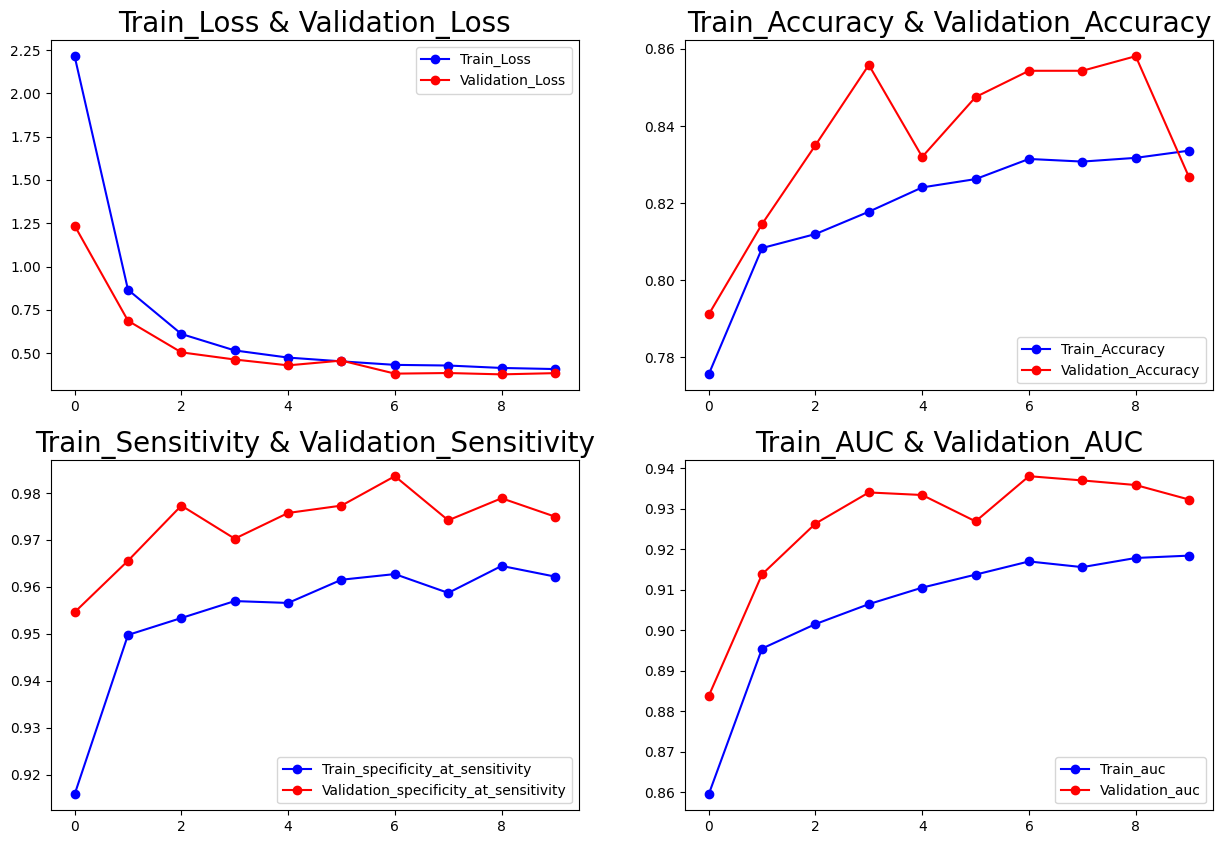

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(hist_['specificity_at_sensitivity'],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(hist_['val_specificity_at_sensitivity'],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(hist_['auc'],'b-o',label='Train_auc')
plt.plot(hist_['val_auc'],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [30]:
# Get all the metrics (loss, accuracy, specificity_at_sensitivity, auc)
metrics = model.evaluate(test_generator, verbose=0)

# Assign values to variables
loss = metrics[0]
accuracy = metrics[1]
auc = metrics[2]

# Print the metrics
print('Test Loss =', loss)
print('Test Accuracy =', accuracy)
print('Test AUC =', auc)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss = 0.3771069347858429
Test Accuracy = 0.8569806814193726
Test AUC = 0.9356380701065063


In [31]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 192ms/step


,Actual,Prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2638,0,0
2639,0,1
2640,0,1
2641,0,1


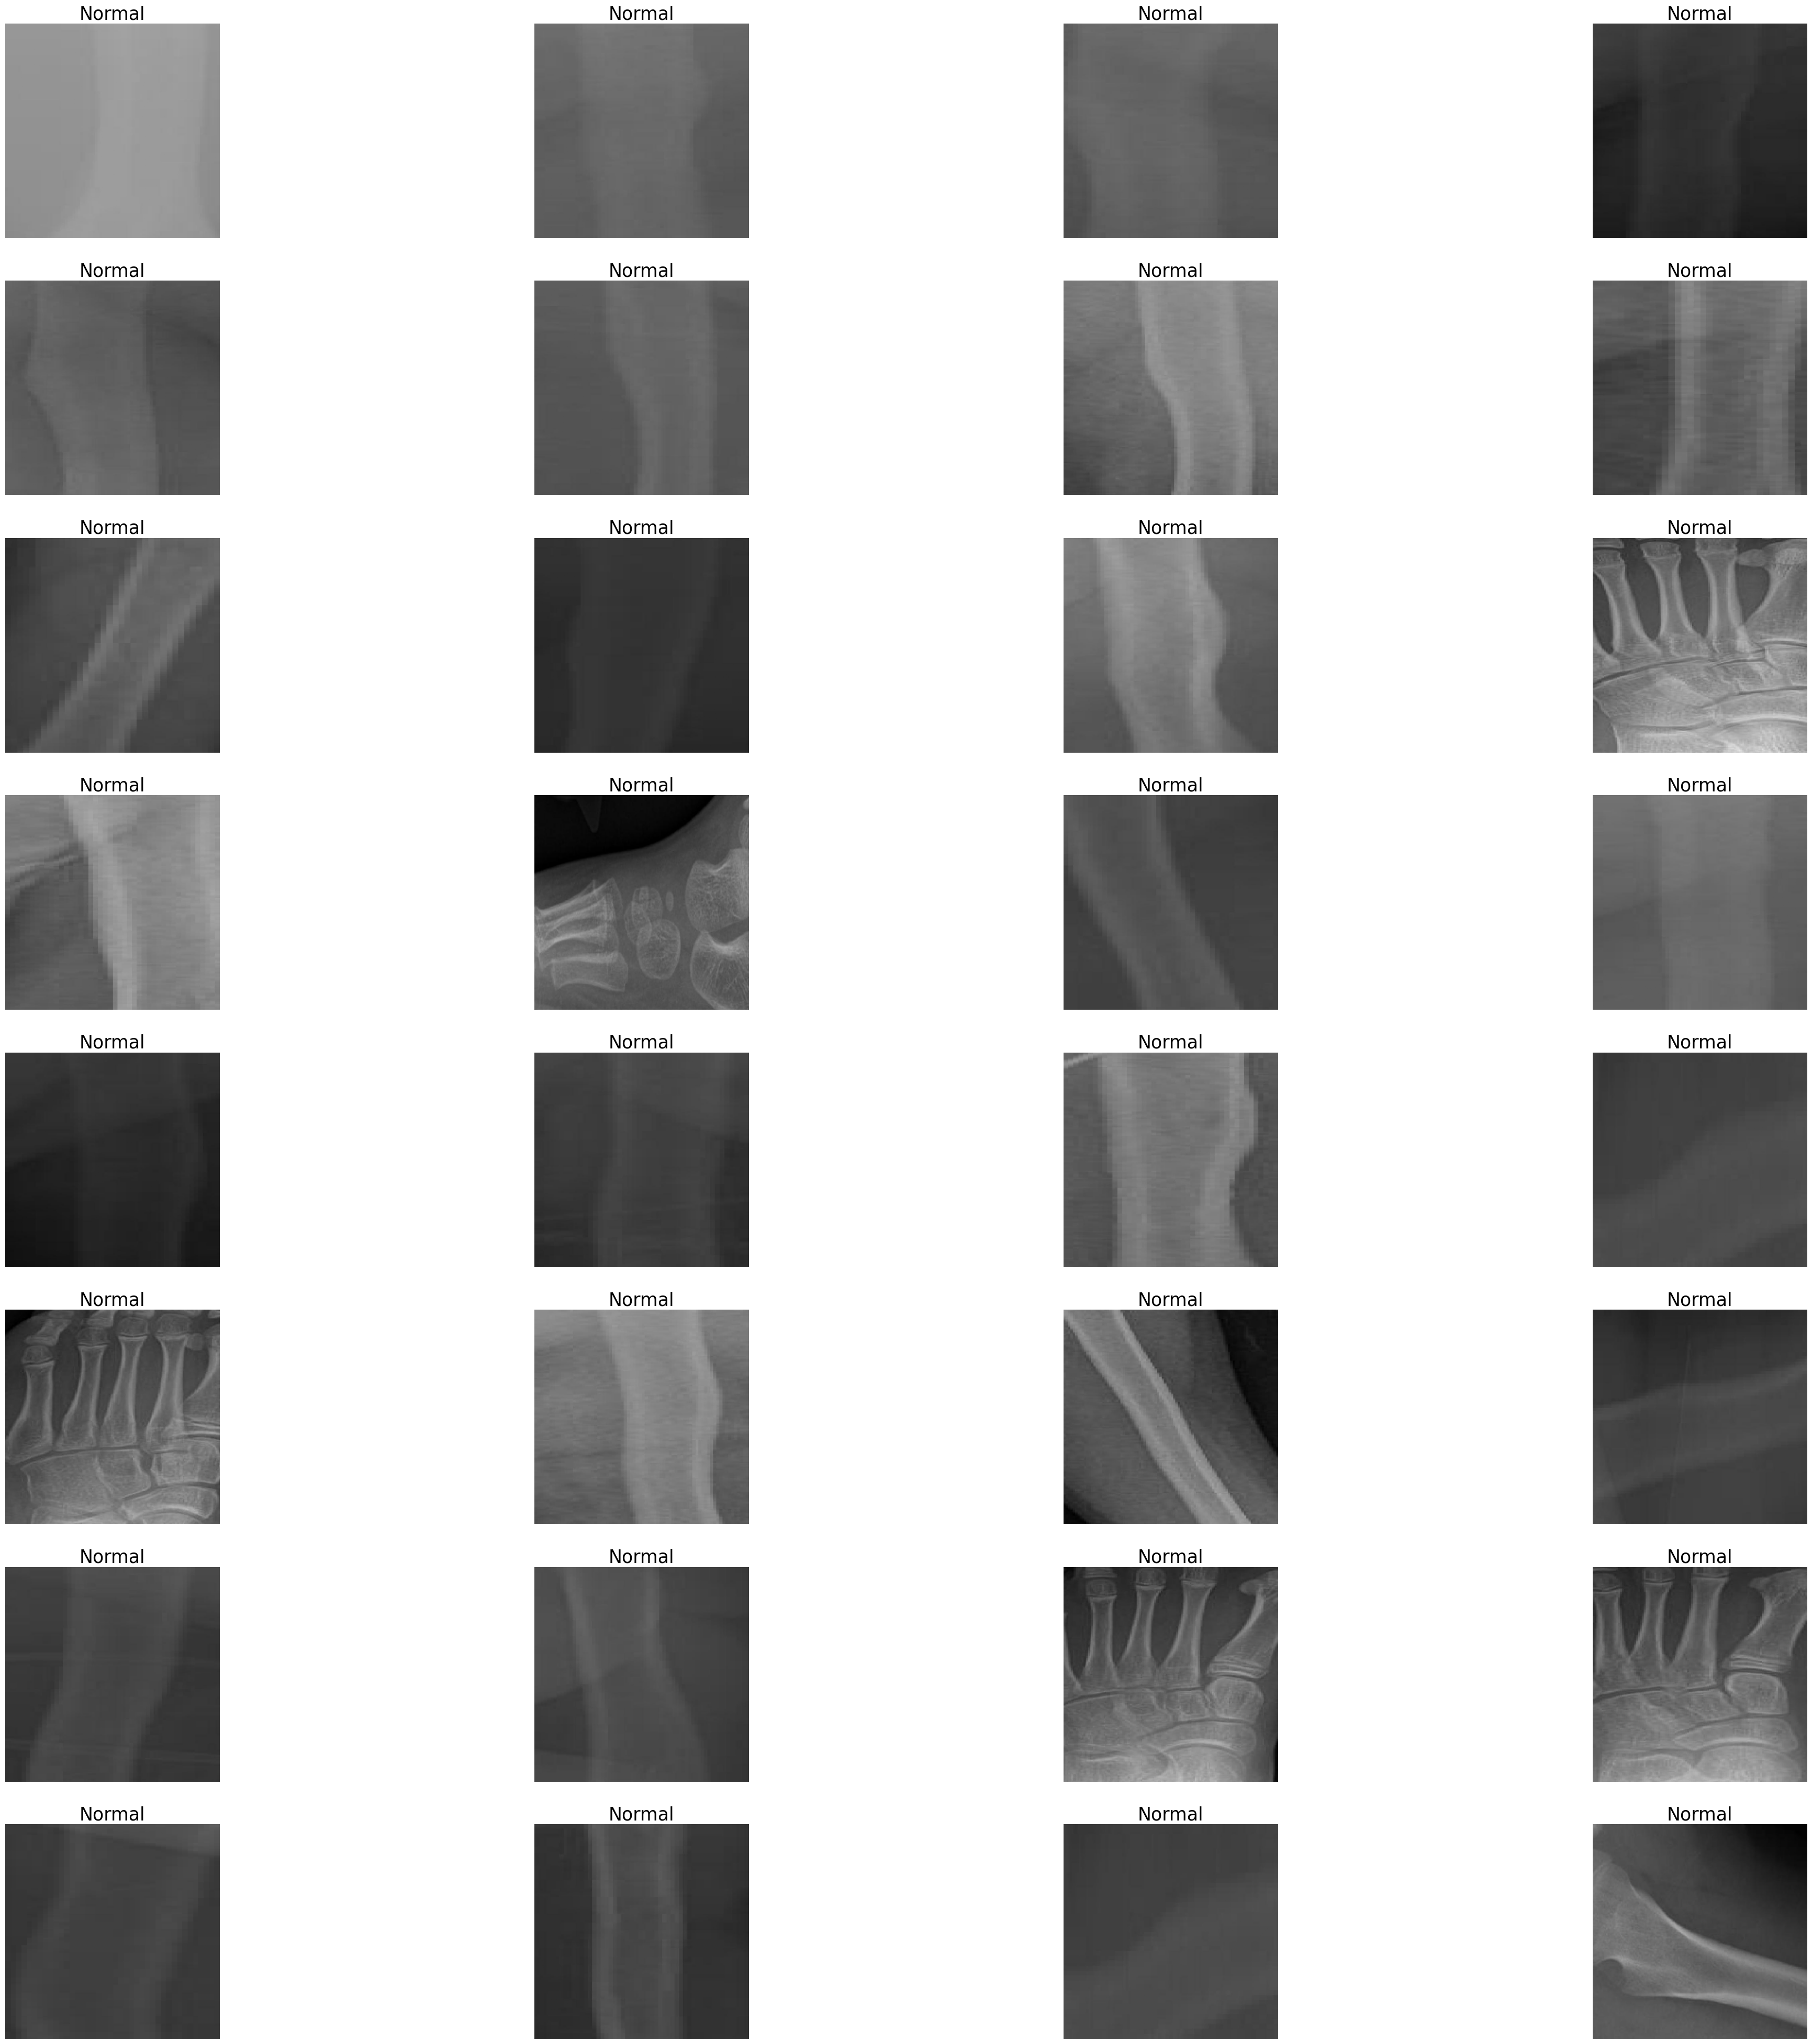

In [32]:
class_names=['Cancer', 'Normal']
batch = next(test_generator)
images= batch[0]
plt.figure(figsize=(50,50))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(class_names[int(y_test[n])],fontsize=25)

In [33]:
# Import the necessary library and function
from sklearn.metrics import classification_report


In [34]:
# Classification Report
ClassificationReport = classification_report(y_test, y_pred, target_names=['Cancer','Normal'])
print('Classification Report:\n', ClassificationReport)

Classification Report:
               precision    recall  f1-score   support

      Cancer       0.83      0.88      0.85      1264
      Normal       0.88      0.84      0.86      1379

    accuracy                           0.86      2643
   macro avg       0.86      0.86      0.86      2643
weighted avg       0.86      0.86      0.86      2643



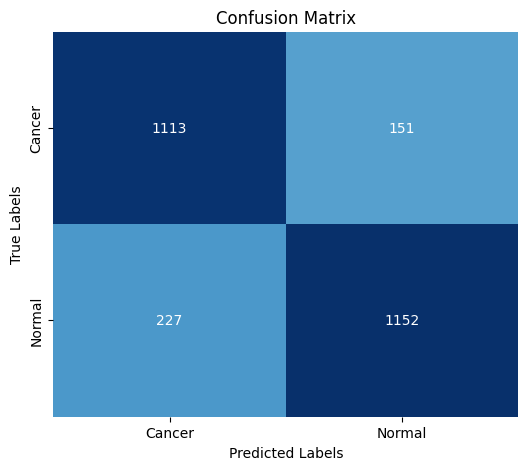

Confusion Matrix:
 [[1113  151]
 [ 227 1152]]


In [35]:
from sklearn.metrics import confusion_matrix # import the confusion_matrix function
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(CM, fmt='g', center=True, cbar=False, annot=True, cmap='Blues',
            xticklabels=['Cancer', 'Normal'],
            yticklabels=['Cancer', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print('Confusion Matrix:\n', CM)

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [37]:
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

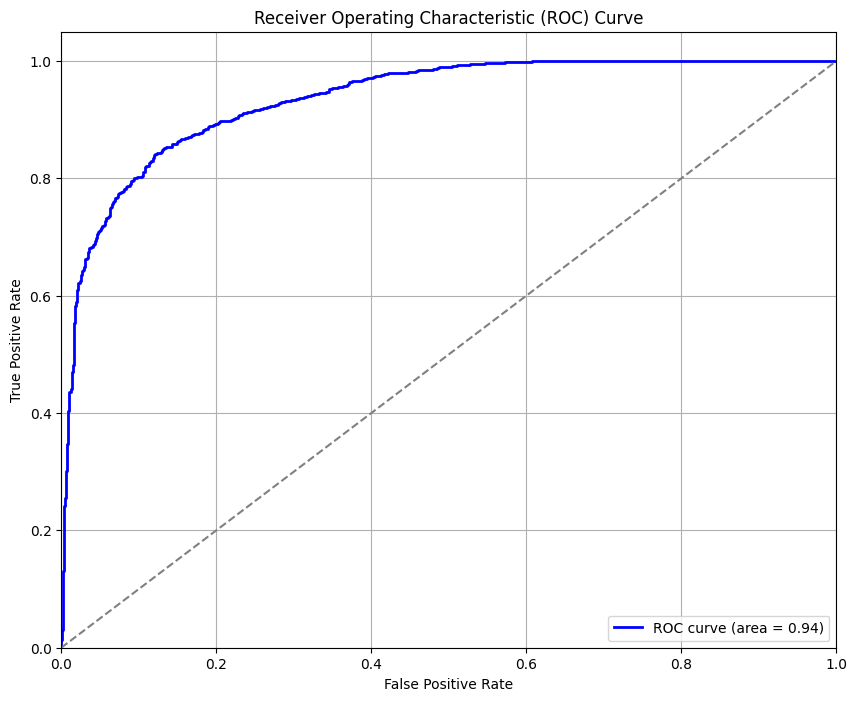

ROC AUC Score: 0.94


In [38]:
# Import the necessary library and function
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels (if not already)
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()

#Calculate fpr, tpr, and roc_auc
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
print(f'ROC AUC Score: {roc_auc:.2f}')